# [第4章: 形態素解析](http://www.cl.ecei.tohoku.ac.jp/nlp100/#ch4)
夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．

In [1]:
!ls Input/neko.txt

Input/neko.txt


In [2]:
!mecab Input/neko.txt > Output/Chapter4/neko.txt.mecab

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [3]:
sentences = []

with open("Output/Chapter4/neko.txt.mecab") as neko_mecab:
    sentence = []
    for line in neko_mecab:
        if line == "\n" or line == "　	記号,空白,*,*,*,*,　,　,　\n":
            continue
        elif line == "EOS\n":
            sentences.append(sentence)
            sentence = []
        else:
            # 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
            foo = line.split("\t")
            bar = foo[1].split(",")
            morpheme = {}
            morpheme["surface"] = foo[0]
            morpheme["base"] = "*" if "*\n" == bar[6] else bar[6]
            morpheme["pos"] = bar[0]
            morpheme["pos1"] = bar[1]
            sentence.append(morpheme)

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [4]:
surfaces_verb = set()

for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            surfaces_verb.add(morpheme["surface"])

In [5]:
#surfaces_verb
list(surfaces_verb)[:10]

['羨ま', 'つか', '捕ら', '書き入れ', 'かくれ', 'おれ', 'はいり', '張る', '繰返し', 'あぶら']

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [6]:
bases_verb = set()

for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            bases_verb.add(morpheme["base"])

In [7]:
#bases_verb
list(bases_verb)[:10]

['取り乱す', 'しごく', '張る', '褪める', 'ほのめかす', '絶つ', '断つ', 'かける', '睡る', '食い切る']

## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [8]:
surfaces_noun_sa = set()

for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "名詞" and morpheme["pos1"] == "サ変接続":
            surfaces_noun_sa.add(morpheme["base"])

In [9]:
#surfaces_noun_sa
list(surfaces_noun_sa)[:10]

['想像', '割愛', '萎縮', '反響', '評', '到着', '婚姻', '九拝', '予期', '処刑']

## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [10]:
import re

In [11]:
surfaces_noun = set()

for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "名詞":
            surfaces_noun.add(morpheme["base"])

In [12]:
noun_no_nouns = set()

for sentence in sentences:
    for morpheme in sentence:
        surface = morpheme["base"]
        if "の" not in surface:
            continue
        match = re.search(r"(.*)の(.*)", surface)
        if match.group(1) in surfaces_noun and match.group(2) in surfaces_noun:
            noun_no_nouns.add(surface)

In [13]:
#noun_no_nouns
list(noun_no_nouns)[:10]

['その他', '気の毒', '男の子', '腋の下', '血の道', '板の間', '女の子', '思いのほか', 'その後', '腹の中']

## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [14]:
concats_noun = set()

for sentence in sentences:
    idx = 0
    while idx < len(sentence)-1:
        if sentence[idx]["pos"] != "名詞" or sentence[idx+1]["pos"] != "名詞":
            idx += 1
            continue

        concat_noun = sentence[idx]["surface"] + sentence[idx+1]["surface"]
        idx += 2
        while idx < len(sentence) and sentence[idx]["pos"] == "名詞":
            concat_noun += sentence[idx]["surface"]
            idx += 1
        concats_noun.add(concat_noun)

In [15]:
#concats_noun
list(concats_noun)[:10]

['毎日毎日ボール', '十二個', '反覆読誦', '水葵', '五円二十銭', '体量', '意気込', '舌肉', '湯壺', '水彩画']

## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [16]:
frequencies = {}

for sentence in sentences:
    for morpheme in sentence:
        base = morpheme["base"]
        if base in frequencies:
            frequencies[base] += 1
        else:
            frequencies[base] = 1

frequencies = sorted(frequencies.items(), key=lambda x:x[1], reverse=True)

In [17]:
frequencies[:10]

[('の', 9194),
 ('。', 7486),
 ('て', 6848),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5975),
 ('と', 5508),
 ('が', 5337)]

## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
%matplotlib inline

In [20]:
sns.set(style="darkgrid", context="notebook", palette="muted")

In [21]:
data_top10 = pd.DataFrame({
    "単語": [frequencies[i][0] for i in range(10)],
    "出現頻度": [frequencies[i][1] for i in range(10)],
})

In [22]:
data_top10

,単語,出現頻度
0,の,9194
1,。,7486
2,て,6848
3,、,6772
4,は,6420
5,に,6243
6,を,6071
7,だ,5975
8,と,5508
9,が,5337


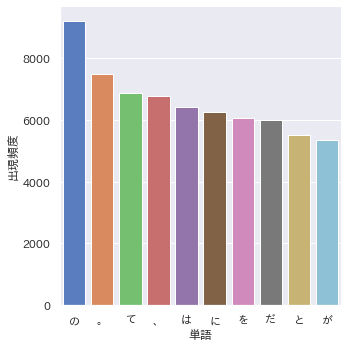

In [23]:
sns.catplot(x="単語", y="出現頻度", data=data_top10, kind="bar")

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

In [24]:
frequency2count = {}

for frequency in frequencies:
    if frequency[1] in frequency2count:
        frequency2count[frequency[1]] += 1
    else:
        frequency2count[frequency[1]] = 1

frequency2count = sorted(frequency2count.items(),
                         key=lambda x:x[0],
                         reverse=True)

In [25]:
data_count = pd.DataFrame({
    "出現頻度": [frequency[0] for frequency in frequency2count],
    "単語の種類数": [count[1] for count in frequency2count],
})

In [26]:
data_count.head(10)

,出現頻度,単語の種類数
0,9194,1
1,7486,1
2,6848,1
3,6772,1
4,6420,1
5,6243,1
6,6071,1
7,5975,1
8,5508,1
9,5337,1


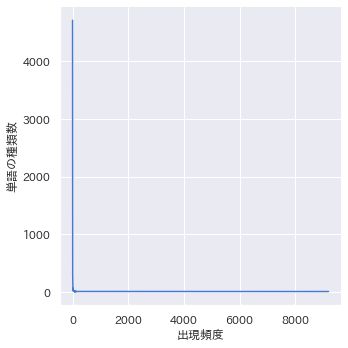

In [27]:
sns.relplot(x="出現頻度", y="単語の種類数", data=data_count, kind="line")

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [28]:
from math import log

In [29]:
rank_log = []
count_log = []
count = 0

for i, frequency in enumerate(frequencies):
    if frequency[1] != count:
        rank = i + 1
        count = frequency[1]
        rank_log.append(log(rank))
        count_log.append(log(count))

In [30]:
data_zipf = pd.DataFrame({
    "log(出現頻度順位)": rank_log,
    "log(出現頻度)": count_log,
})

In [31]:
data_zipf

,log(出現頻度順位),log(出現頻度)
0,0.000000,9.126306
1,0.693147,8.920790
2,1.098612,8.831712
3,1.386294,8.820552
4,1.609438,8.767173
...,...,...
236,7.867489,1.609438
237,8.029433,1.386294
238,8.208764,1.098612
239,8.440312,0.693147


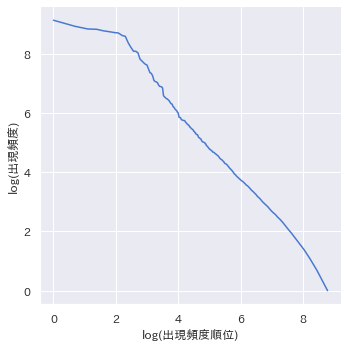

In [32]:
sns.relplot(x="log(出現頻度順位)", y="log(出現頻度)", data=data_zipf, kind="line")